In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sep
import math
import keras
from keras.utils import np_utils
from keras.models import load_model

import numpy as np
from astropy.io import fits

import random 
import aplpy


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

np.random.seed(123)  # for reproducibility

Using TensorFlow backend.


DOWNLOADING CNN MODEL 

In [4]:
model = load_model("CNNsingle.h5")

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 19, 10)        190       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 5)         455       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 5)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 3)           138       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 3)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3)                

DOWNLOADING DATA

In [5]:
data_galaxy = np.load('datasets/galaxy_ic4559_images_scaled.npy')
labels_galaxy = np.load('datasets/galaxy_ic4559_labels_scaled.npy')

PREDICTION

In [6]:
labels_predict = model.predict(data_galaxy)

In [7]:
labels_predict2 = np.argmax(labels_predict, axis=-1)

In [8]:
accuracy_score(labels_galaxy, labels_predict2)

0.9921875

In [9]:
confusion_matrix(labels_galaxy, labels_predict2)

array([[315,   5],
       [  0, 320]])

In [6]:
def prediction (data, labels):
    labels_predict = model.predict(data)
    labels_predict2 = np.argmax(labels_predict, axis=-1)
    
    metrics = []
    
    metrics.append(accuracy_score(labels, labels_predict2))
    metrics.append(precision_score(labels, labels_predict2))
    metrics.append(recall_score(labels, labels_predict2))
    metrics.append(f1_score(labels, labels_predict2))
    
    acc = accuracy_score(labels, labels_predict2)
    conf_mat = confusion_matrix(labels, labels_predict2)
    
    return metrics, conf_mat
    

In [7]:
data_galaxy_pgc21577_nonscaled = np.load('datasets/galaxy_pgc21577_images.npy')
labels_galaxy_pgc21577 = np.load('datasets/galaxy_pgc21577_labels_scaled.npy')
accuracy2, matrix2 = prediction(data_galaxy_pgc21577_nonscaled, labels_galaxy_pgc21577)
print(matrix2,accuracy2)

[[ 95 315]
 [  1 409]] [0.6146341463414634, 0.5649171270718232, 0.9975609756097561, 0.7213403880070546]


In [8]:
data_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_images.npy')
labels_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_labels_scaled.npy')
accuracy3, matrix3 = prediction(data_galaxy_pgc21708, labels_galaxy_pgc21708)
print(matrix3,accuracy3)

[[ 90 256]
 [  1 345]] [0.6286127167630058, 0.5740432612312812, 0.9971098265895953, 0.7286166842661035]


In [9]:
data_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_images.npy')
labels_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_labels_scaled.npy')
accuracy4, matrix4 = prediction(data_galaxy_pgc21747, labels_galaxy_pgc21747)
print(matrix4, accuracy4)

[[ 71 257]
 [  1 327]] [0.6067073170731707, 0.559931506849315, 0.9969512195121951, 0.7171052631578947]


In [10]:
data_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_images.npy')
labels_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_labels_scaled.npy')
accuracy5, matrix5 = prediction(data_galaxy_pgc21856, labels_galaxy_pgc21856)
print(matrix5, accuracy5)

[[ 94 187]
 [  0 281]] [0.6672597864768683, 0.6004273504273504, 1.0, 0.7503337783711614]


In [15]:
accuracy, matrix = prediction(data_galaxy, labels_galaxy)
print(matrix,accuracy)


[[315   5]
 [  0 320]] 0.9921875


In [11]:
data_galaxy_pgc21577 = np.load('datasets/galaxy_pgc21577_images_scaled.npy')
labels_galaxy_pgc21577 = np.load('datasets/galaxy_pgc21577_labels_scaled.npy')
accuracy2, matrix2 = prediction(data_galaxy_pgc21577, labels_galaxy_pgc21577)
print(matrix2,accuracy2)


[[405   5]
 [  2 408]] [0.9914634146341463, 0.9878934624697336, 0.9951219512195122, 0.9914945321992709]


In [12]:
data_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_images_scaled.npy')
labels_galaxy_pgc21708 = np.load('datasets/galaxy_pgc21708_labels_scaled.npy')
accuracy3, matrix3 = prediction(data_galaxy_pgc21708, labels_galaxy_pgc21708)
print(matrix3,accuracy3)

[[339   7]
 [  3 343]] [0.9855491329479769, 0.98, 0.9913294797687862, 0.985632183908046]


In [13]:
data_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_images_scaled.npy')
labels_galaxy_pgc21747 = np.load('datasets/galaxy_pgc21747_labels_scaled.npy')
accuracy4, matrix4 = prediction(data_galaxy_pgc21747, labels_galaxy_pgc21747)
print(matrix4, accuracy4)

[[317  11]
 [  1 327]] [0.9817073170731707, 0.9674556213017751, 0.9969512195121951, 0.9819819819819819]


In [14]:
data_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_images_scaled.npy')
labels_galaxy_pgc21856 = np.load('datasets/galaxy_pgc21856_labels_scaled.npy')
accuracy5, matrix5 = prediction(data_galaxy_pgc21856, labels_galaxy_pgc21856)
print(matrix5, accuracy5)

[[277   4]
 [  0 281]] [0.9928825622775801, 0.9859649122807017, 1.0, 0.9929328621908127]


In [15]:
def merging_datasets(d1,l1,d2,l2,d3,l3,d4,l4,d5,l5):
    
           
    dataset = np.append(d1,d2, axis=0)
    dataset2 = np.append(dataset,d3, axis=0)
    dataset3 = np.append(dataset2,d4, axis=0)
    dataset4 = np.append(dataset3,d5, axis=0)

    labels = np.append(l1,l2, axis=0)
    labels2 = np.append(labels,l3, axis=0)
    labels3 = np.append(labels2,l4, axis=0)
    labels4 = np.append(labels3,l5, axis=0)
    
    
    return dataset4, labels4

In [16]:
data, lab = merging_datasets(data_galaxy, labels_galaxy, data_galaxy_pgc21577, labels_galaxy_pgc21577, data_galaxy_pgc21708, labels_galaxy_pgc21708, data_galaxy_pgc21747, labels_galaxy_pgc21747, data_galaxy_pgc21856, labels_galaxy_pgc21856)

In [15]:
print(prediction(data, lab))

([0.9887240356083086, 0.9812974868497955, 0.9964391691394658, 0.9888103651354535], array([[1653,   32],
       [   6, 1679]]))


In [17]:
labels_predict = model.predict(data)
labels_predict2 = np.argmax(labels_predict, axis=-1)

In [25]:
for i in range(len(lab)):
    if lab[i]!=labels_predict2[i]:
        print(i)
        print(lab[i])

0
0.0
37
0.0
145
0.0
244
0.0
318
0.0
641
0.0
722
0.0
912
0.0
973
0.0
976
0.0
1298
1.0
1386
1.0
1491
0.0
1532
0.0
1571
0.0
1572
0.0
1640
0.0
1788
0.0
1804
0.0
1829
1.0
1952
1.0
2141
1.0
2156
0.0
2157
0.0
2159
0.0
2166
0.0
2172
0.0
2200
0.0
2209
0.0
2228
0.0
2371
0.0
2417
0.0
2436
0.0
2492
1.0
2895
0.0
2904
0.0
2973
0.0
3008
0.0


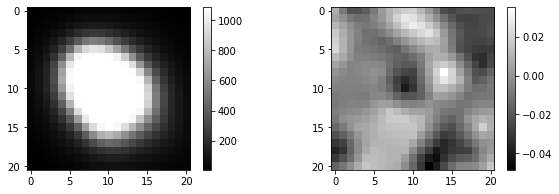

In [29]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)    
fig_1 = ax.imshow(data[2141,:,:,0], cmap='gray')
fig_2 = ax2.imshow(data[2141,:,:,1], cmap='gray')

f.colorbar(fig_1, ax=ax)
f.colorbar(fig_2, ax=ax2)

plt.savefig('pictures/CNNerror3.png')

In [27]:
lab[1386]

1.0